In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mytools.regression as reg

# import datetime

## Sigmoid fitting for intensive care patients

`ftol` termination condition is satisfied.
Function evaluations 21, initial cost 1.3451e+00, final cost 5.4330e-04, first-order optimality 4.20e-08.
[0.65       0.44157303 1.        ]
`gtol` termination condition is satisfied.
Function evaluations 14, initial cost 5.2239e+00, final cost 1.3999e-03, first-order optimality 3.99e-09.


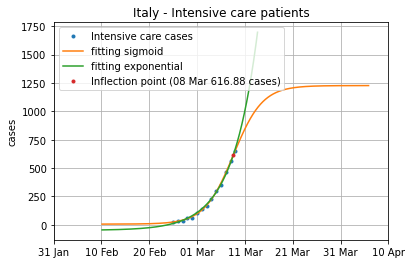

In [4]:
data = np.genfromtxt(fname='italy-intensive_care.csv', delimiter=',', names=True)

x_orig = data['day']
y_orig = data['intensive_care']

model, xp, pxp = reg.fit_sigmoid(x_orig, y_orig)
flex = reg.sigmoid_get_flex(model)

exp_model, exp_xp, exp_pxp = reg.fit_exponential(x_orig, y_orig, upper=1.25)

# Plot the results
plt.plot(x_orig, y_orig, '.', label='Intensive care cases')
plt.plot(xp, pxp, '-', label='fitting sigmoid')
plt.plot(exp_xp, exp_pxp, '-', label='fitting exponential')
plt.plot(flex[0], flex[1], '.', label='Inflection point ('+reg.day_of_year_to_date(flex[0]).strftime("%d %b")+' '+'{:.2f}'.format(flex[1])+' cases)')
locs, labels = plt.xticks()
a = list((reg.day_of_year_to_date(v)).strftime("%d %b") for v in locs.tolist())
plt.xticks(ticks=locs.tolist(), labels=a)

plt.ylabel('cases', rotation='vertical')
plt.grid(True)
plt.title('Italy - Intensive care patients')
plt.legend(loc='upper left')
plt.show()